# Import Modules, Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib ipympl
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA

#Gaussian
from sklearn.mixture import GaussianMixture

# For Density based clustering
import umap
import hdbscan
from sklearn.cluster import DBSCAN

#Misc
from yellowbrick.cluster import KElbowVisualizer

In [3]:
Data=pd.read_csv('data.csv/data.csv',index_col='id')

## Data Exploration
### Correlation between features

In [40]:
data_cont=pd.concat([Data.iloc[:,:7],Data.iloc[:,14:]],axis=1)
data_cont.corr()

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
f_00  1.000000 -0.001955  0.002660  0.000105  0.008797  0.003817  0.002903   
f_01 -0.001955  1.000000  0.001402 -0.001698 -0.001727 -0.001444  0.001826   
f_02  0.002660  0.001402  1.000000 -0.003271 -0.000732 -0.003743  0.003730   
f_03  0.000105 -0.001698 -0.003271  1.000000  0.000238  0.009835  0.002570   
f_04  0.008797 -0.001727 -0.000732  0.000238  1.000000  0.004550  0.004143   
f_05  0.003817 -0.001444 -0.003743  0.009835  0.004550  1.000000  0.004825   
f_06  0.002903  0.001826  0.003730  0.002570  0.004143  0.004825  1.000000   
f_14 -0.003255 -0.003968  0.002112  0.004566  0.001196  0.003204 -0.000707   
f_15  0.005267 -0.000157  0.005397  0.001454 -0.002549 -0.001235  0.004625   
f_16 -0.001998  0.000941 -0.003674 -0.000372 -0.003036  0.003359  0.003590   
f_17  0.005100 -0.000327 -0.002383  0.003240 -0.002535 -0.002734  0.004411   
f_18 -0.000561  0.003146  0.006187  0.002039  0.000748  0.002783 -0.006175   
f_19  0.000437 -0.001402 -0.002743  0.000540  0.000731  0.007995 -0.005252   
f_20  0.002687 -0.001852  0.002398 -0.005607  0.000549  0.000832  0.000395   
f_21 -0.000447  0.001099 -0.000301  0.006154 -0.000956 -0.002269 -0.002691   
f_22  0.004087 -0.002965  0.004971  0.001807  0.003801  0.002085  0.000597   
f_23 -0.003756  0.001760  0.002971  0.001241 -0.002564 -0.003774 -0.002754   
f_24  0.001088 -0.005635 -0.002328 -0.002235 -0.000324  0.002300 -0.002924   
f_25  0.006216  0.000033  0.001797  0.000362 -0.000765  0.002087 -0.006603   
f_26  0.000615 -0.001936 -0.001460  0.002074  0.002906 -0.001417 -0.000150   
f_27  0.003888  0.000229  0.002210  0.000427  0.001421 -0.003124 -0.005421   
f_28  0.001103 -0.005528  0.000544  0.001842 -0.003389  0.002519 -0.000110   

          f_14      f_15      f_16  ...      f_19      f_20      f_21  \
f_00 -0.003255  0.005267 -0.001998  ...  0.000437  0.002687 -0.000447   
f_01 -0.003968 -0.000157  0.000941  ... -0.001402 -0.001852  0.001099   
f_02  0.002112  0.005397 -0.003674  ... -0.002743  0.002398 -0.000301   
f_03  0.004566  0.001454 -0.000372  ...  0.000540 -0.005607  0.006154   
f_04  0.001196 -0.002549 -0.003036  ...  0.000731  0.000549 -0.000956   
f_05  0.003204 -0.001235  0.003359  ...  0.007995  0.000832 -0.002269   
f_06 -0.000707  0.004625  0.003590  ... -0.005252  0.000395 -0.002691   
f_14  1.000000  0.001607  0.001570  ... -0.000835 -0.000451  0.001578   
f_15  0.001607  1.000000  0.007094  ... -0.004414 -0.002441  0.001769   
f_16  0.001570  0.007094  1.000000  ...  0.002479  0.001660  0.002605   
f_17 -0.001449  0.000406  0.002536  ...  0.002548  0.002749 -0.006562   
f_18  0.005759  0.006236  0.003980  ...  0.001414  0.004967  0.001448   
f_19 -0.000835 -0.004414  0.002479  ...  1.000000  0.002081  0.004865   
f_20 -0.000451 -0.002441  0.001660  ...  0.002081  1.000000  0.004519   
f_21  0.001578  0.001769  0.002605  ...  0.004865  0.004519  1.000000   
f_22 -0.001629 -0.004125  0.003349  ... -0.003659  0.000033 -0.002598   
f_23  0.001980 -0.004534 -0.001059  ...  0.000045  0.000338 -0.001129   
f_24  0.000781 -0.004002 -0.000111  ... -0.001132 -0.000231 -0.002541   
f_25 -0.007537  0.001268  0.002177  ... -0.001998  0.002113 -0.007879   
f_26 -0.002692 -0.003444  0.008018  ... -0.000170 -0.004437 -0.001091   
f_27 -0.000292  0.004094 -0.008543  ... -0.001780 -0.004339  0.002864   
f_28 -0.003791  0.004737  0.003489  ...  0.001563  0.001180  0.002739   

          f_22      f_23      f_24      f_25      f_26      f_27      f_28  
f_00  0.004087 -0.003756  0.001088  0.006216  0.000615  0.003888  0.001103  
f_01 -0.002965  0.001760 -0.005635  0.000033 -0.001936  0.000229 -0.005528  
f_02  0.004971  0.002971 -0.002328  0.001797 -0.001460  0.002210  0.000544  
f_03  0.001807  0.001241 -0.002235  0.000362  0.002074  0.000427  0.001842  
f_04  0.003801 -0.002564 -0.000324 -0.000765  0.002906  0.001421 -0.003389  
f_05  0.002085 -0.003774  0.002300  0.002087 -0.001417 -0.003124  0.00251

# Misc

### Functions to visualize KPCA against features

#### 2D

In [22]:
def visualizePCA2D(pca_data,a,b,alpha=0.5,cmap='viridis'):
    fig, axes=plt.subplots(5,6,figsize=(11,12))
#     fig.canvas.header_visible = False
    x,y=pca_data.shape
    for feature,ax in zip(features,axes.ravel()[:-1]):
        size=a+(b*data_scaled[0:x,features.index(feature)])
        col=data_scaled[0:x,features.index(feature)]
        ax.scatter(pca_data[:,0],pca_data[:,1],cmap=cmap,s=size,alpha=alpha,c=col)
        ax.tick_params(axis='both',which='both',top=False,bottom=False,right=False,left=False,
                       labelleft=False,labelbottom=False)
        ax.set_title(feature,fontsize=10)
    fig.delaxes(axes[4][5])
    plt.tight_layout()

#### 3D

In [ ]:
from mpl_toolkits.mplot3d import axes3d
def visualizePCA3D(pca_data,a,b,alpha=0.5,cmap='viridis'):
#     fig, axes=plt.subplots(5,6,figsize=(14,14))
    fig=plt.figure(figsize=(12,21))
    fig.canvas.header_visible=False
#     axes=fig.add_subplots(5,6,projection='3d')
    x,y=pca_data.shape
    for feature, No in zip(features,range(1,30)):
        ax=fig.add_subplot(10,3,No,projection='3d')
        size=a+(b*data_scaled[0:x,features.index(feature)])
        col=data_scaled[0:x,features.index(feature)]
        ax.scatter(pca_data[:,0],pca_data[:,1],pca_data[:,2],
                   cmap=cmap,s=size,alpha=alpha,c=col)
        ax.tick_params(axis='both',which='both',top=False,bottom=False,right=False,left=False,
                       labelleft=False,labelbottom=False)
#     fig.delaxes(axes[4][5])
    plt.tight_layout()

# KMeans

## KBins-PCA-KMeans
### *Logic & Realizations*
* NO REAL LOGIC. 
* Simply thought that by grouping each variable into bins, there is a higher likelihood that some records would be similar (higher chance two records have f_00 feature as bin X rather than 4.32)
* Did PCA because I thought there were too many columns - just realized binning preserved shape of data so no need

### KBins Discretizer for continuous features

In [5]:
Dummies=list(Data.columns)[7:14]
data_new=pd.get_dummies(Data,columns=Dummies,prefix=Dummies)
data_onlynum=data_new.iloc[:,0:22]

In [6]:
disc=KBinsDiscretizer(n_bins=5,strategy='kmeans',encode='ordinal')
disc_data=disc.fit_transform(data_onlynum)

### PCA on cols, which contain ordinal data 
* _(bins as integer value)_

In [7]:
model=PCA(n_components=0.9)
pca_data=model.fit_transform(disc_data)

### Kmeans on PCA data - 20 components

In [8]:
clusterer=KMeans(n_clusters=6,n_init=30,algorithm='full')
clusters=clusterer.fit_predict(pca_data)

### Visualizing clusters on PCA (2 components)

In [10]:
model=PCA(n_components=2)
pca_data=model.fit_transform(disc_data)

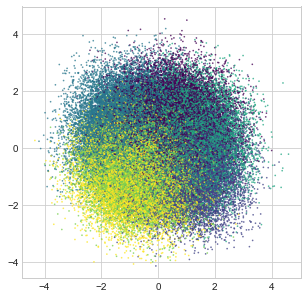

In [15]:
fig, ax=plt.subplots(figsize=(5,5))
ax.scatter(pca_data[:,0],pca_data[:,1],s=0.5,alpha=0.7,c=clusters,cmap='viridis')
plt.show()

## KBins - KMeans
### *Logic and Realizations*
* Still no clear logic apart from earlier one (binning data might 'induce' clusters because records are likely to have the same bin no.)
* No clear clusters visually after PCA

### KBins Discretizer for continuous features

In [18]:
Dummies=list(Data.columns)[7:14]
data_new=pd.get_dummies(Data,columns=Dummies,prefix=Dummies)
data_onlynum=data_new.iloc[:,0:22]

In [19]:
disc=KBinsDiscretizer(n_bins=5,strategy='kmeans',encode='ordinal')
disc_data=disc.fit_transform(data_onlynum)

### KElbow Visualizer for cluster no

#### Silhouette

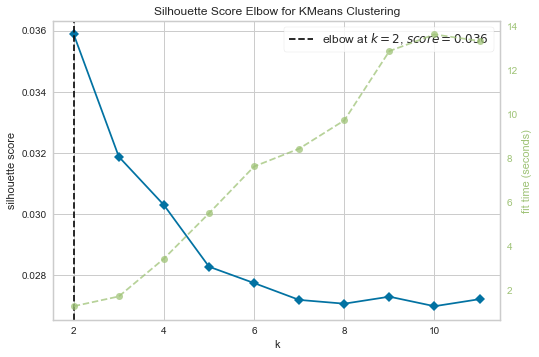

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
#Takes a long time to run
clusterer=KMeans()
visualizer=KElbowVisualizer(clusterer,k=(2,12),metric='silhouette')
visualizer.fit(disc_data)
visualizer.show()

#### Distortion
* Average of Sum of Squared distances between data points and their assigned cluster centroids

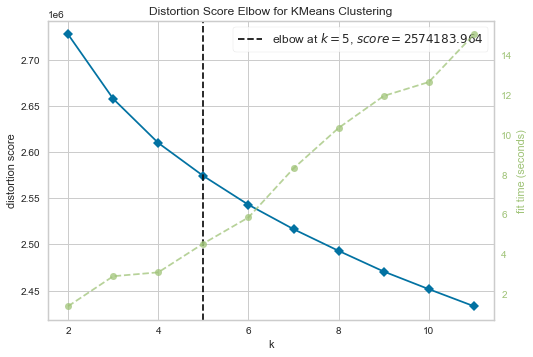

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
clusterer=KMeans()
visualizer=KElbowVisualizer(clusterer,k=(2,12),metric='distortion')
visualizer.fit(disc_data)
visualizer.show()

### Kmeans on Binned (continuous) data
* Following Distortion score, n=5
* Try with algorithm=full and default wo specifying
* Does increasing init lead to any difference?

In [24]:
clusterer=KMeans(n_clusters=5,n_init=40)
clusters=clusterer.fit_predict(disc_data)

### Visualizing clusters on PCA (2 components)

In [25]:
model=PCA(n_components=2)
pca_data=model.fit_transform(disc_data)

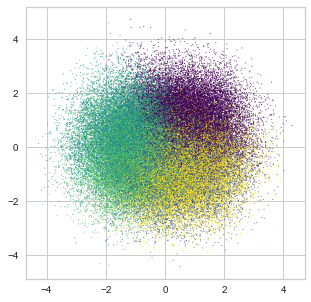

In [26]:
fig, ax=plt.subplots(figsize=(5,5))
ax.scatter(pca_data[:,0],pca_data[:,1],s=0.5,alpha=0.7,c=clusters,cmap='viridis')
plt.show()

## Scaled Data, KMeans + UMAP Visualize
### Logic & Realizations
* KMeans so far has given a 0.25 score on Kaggle (not sure if its the same as accuracy). How KMeans lights up embedding can give a feel of whether UMAP works
* How do the clusters predicted by KMeans light up on UMAP of entire scaled dataset?
* How do the clusters predicted by KMeans light up on the Int-Dummies-Hamming UMAP

### Standardize entire dataset

In [19]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(Data)

### KMeans Clusters

In [21]:
clusterer=KMeans(n_clusters=6,n_init=60)
clusters=clusterer.fit_predict(data_scaled)

### UMAP for visualizing
- Observations from parameter changes:
    - Alter local_connectivity <=2 , metric

#### UMAP: Entire scaled Data, Cosine

In [22]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

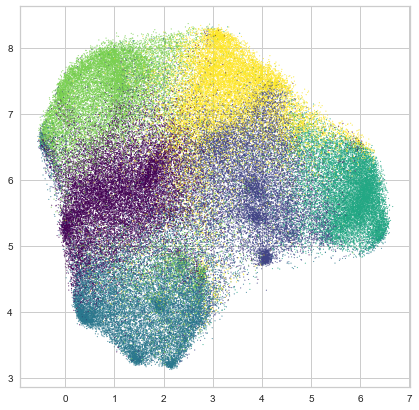

In [23]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters,cmap='viridis')
plt.show()

#### UMAP: Num scaled Data, Cosine

##### Slice Data

In [14]:
data_cont=pd.concat([Data.iloc[:,:7],Data.iloc[:,14:]],axis=1)

In [15]:
reducer=umap.UMAP(n_neighbors=45,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_cont)

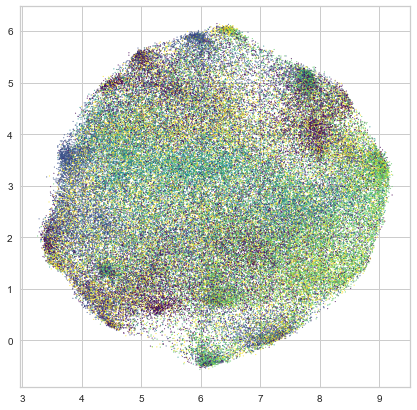

In [16]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters,cmap='viridis')
plt.show()

##### Same but Euclidean

In [17]:
reducer=umap.UMAP(n_neighbors=45,n_components=2,min_dist=0.0,
                  n_epochs=400,n_jobs=-1,local_connectivity=2)
umap_data=reducer.fit_transform(data_cont)

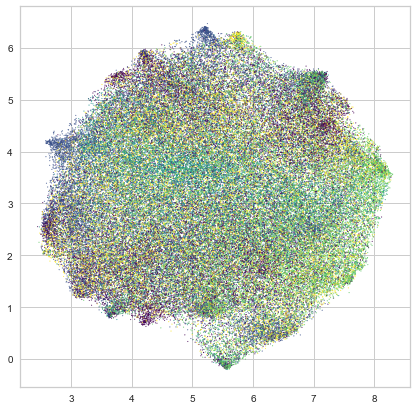

In [18]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters,cmap='viridis')
plt.show()

#### UMAP: Int Dummies, Hamming metric

##### Generate dummies

In [11]:
Dummies=list(Data.columns)[7:14]
data_new=pd.get_dummies(Data,columns=Dummies,prefix=Dummies)
data_int_dum=data_new.iloc[:,22:]

##### UMAP+ Visuals

In [12]:
reducer=umap.UMAP(n_neighbors=45,n_components=2,min_dist=0.0,metric='hamming',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_int_dum)

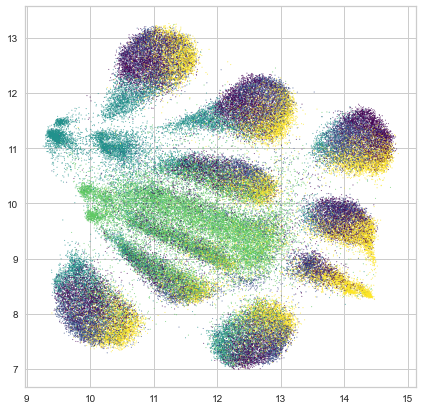

In [13]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.6,alpha=0.6,c=clusters,cmap='viridis')
plt.show()

# Density Based Algorithms

## Int feature dummies - UMAP with Hamming - HDBSCAN
### *Logic and Realizations*
* Maybe the numerical data don't contribute towards determining clusters? Visualizing kPCA by features values (via c,size) showed some variation only for the int features

### Get dummies for int data

In [51]:
Dummies=list(Data.columns)[7:14]
data_new=pd.get_dummies(Data,columns=Dummies,prefix=Dummies)
data_int_dum=data_new.iloc[:,22:]

### Fit UMAP for HDBSCAN components
* To vary:
    * No of components
    * No. of neighbors
    * Slightly increase min_dist?
* More than 2 components for clustering purposes

In [75]:
reducer=umap.UMAP(n_neighbors=45,n_components=8,min_dist=0.0,metric='hamming',
                  n_epochs=400,n_jobs=-1,local_connectivity=2)
umap_dbscan=reducer.fit_transform(data_int_dum)

 ### Fit HDBSCAN to UMAP components
     cluster_selection_epsilon #alter between 0-1

In [76]:
import hdbscan
clusterer=hdbscan.HDBSCAN(min_cluster_size=40,min_samples=5)
clusters=clusterer.fit_predict(umap_dbscan)

### UMAP for 2 components, visualize clusters

In [77]:
reducer=umap.UMAP(n_neighbors=45,n_components=2,min_dist=0.0,metric='hamming',
                  n_epochs=400,n_jobs=-1,local_connectivity=2)
umap_data=reducer.fit_transform(data_int_dum)

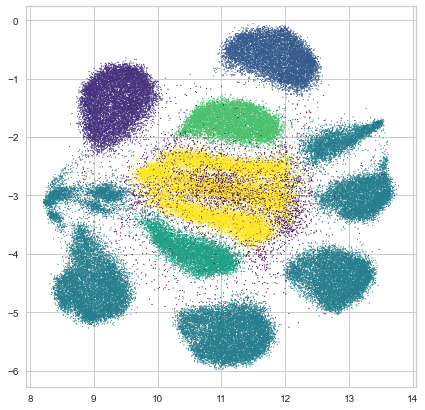

In [78]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.6,alpha=1,c=clusters,cmap='viridis')
plt.show()

#### No. clusters & Distribution

In [79]:
np.unique(clusters,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 4346, 10180,  9165, 43817,  6616,  8044,   142, 15690],
       dtype=int64))

### Submit output on Kaggle
* Low score after modifying all those parameters :(

In [80]:
clusters_df=pd.DataFrame(clusters,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission.csv")

## Cont. features - UMAP - HDBSCAN

### Slice only continuous variables

In [15]:
data_cont=pd.concat([Data.iloc[:,:7],Data.iloc[:,14:]],axis=1)

### UMAP & HDBSCAN
#### Cosine

In [16]:
reducer=umap.UMAP(n_neighbors=45,n_components=5,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1,local_connectivity=2)
umap_dbscan=reducer.fit_transform(data_cont)

 #### Cosine: Fit HDBSCAN to UMAP components
     cluster_selection_epsilon #alter between 0-1

In [17]:
import hdbscan
clusterer=hdbscan.HDBSCAN(min_cluster_size=40,min_samples=5)
clusters=clusterer.fit_predict(umap_dbscan)

#### Cosine: UMAP for 2 components, visualize clusters

In [18]:
reducer=umap.UMAP(n_neighbors=45,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1,local_connectivity=2)
umap_data=reducer.fit_transform(data_cont)

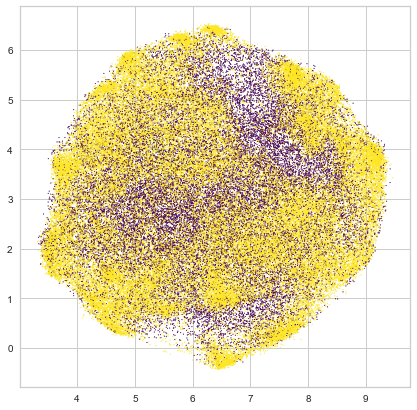

In [19]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.6,alpha=1,c=clusters,cmap='viridis')
plt.show()

#### No. clusters & Distribution

In [20]:
np.unique(clusters,return_counts=True)

(array([-1,  0,  1], dtype=int64), array([28544,    42, 69414], dtype=int64))

## MinMaxScaler for Int var - UMAP - HDBSCAN
### *Logic and Realizations* 
* Straightforward approach compared to above: Int var seem to show the best promise in giving clusters
* Simply scale, feed them to UMAP and look for results
* Try without UMAP as well?

### Gather int data and scale

In [22]:
data_int=Data.iloc[:,7:14]

In [24]:
scaler=MinMaxScaler()
data_int=scaler.fit_transform(data_int)

### UMAP & HDBSCAN
#### Cosine

In [35]:
reducer=umap.UMAP(n_neighbors=45,n_components=4,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_dbscan=reducer.fit_transform(data_int)

 #### Cosine: Fit HDBSCAN to UMAP components
     cluster_selection_epsilon #alter between 0-1

In [36]:
import hdbscan
clusterer=hdbscan.HDBSCAN(min_cluster_size=40,min_samples=5)
clusters=clusterer.fit_predict(umap_dbscan)

#### Cosine: UMAP for 2 components, visualize clusters

In [37]:
reducer=umap.UMAP(n_neighbors=45,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_int)

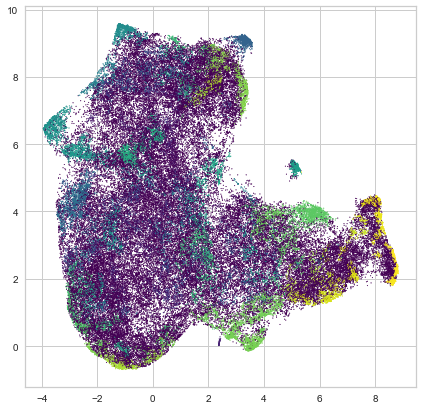

In [38]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.6,alpha=1,c=clusters,cmap='viridis')
plt.show()

#### No. clusters & Distribution

In [39]:
np.unique(clusters,return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

## HDBSCAN using selected features

In [28]:
#slice
features=['f_0'+ str(x) for x in range(0,10)] + ['f_'+ str(x) for x in range(10,29)]

In [31]:
filter1=features[7:14]+features[22:]

In [32]:
scaler=PowerTransformer()
data_scaled=scaler.fit_transform(Data[filter1])

In [36]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

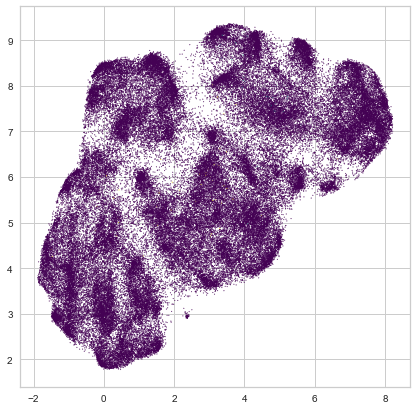

In [40]:
import hdbscan
clusterer=hdbscan.HDBSCAN(min_cluster_size=40,min_samples=5)
clusters_hdb=clusterer.fit_predict(data_scaled)
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters_hdb,cmap='viridis')
plt.show()

# KMeans with UMAP
## n=6, UMAP(2comp)

In [19]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(Data)

In [ ]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

In [ ]:
clusterer=KMeans(n_clusters=6,n_init=60)
clusters_umap=clusterer.fit_predict(umap_data)

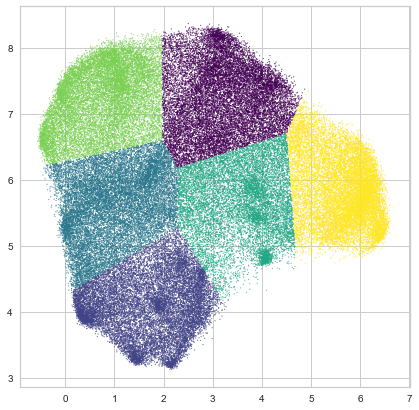

In [24]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters_umap,cmap='viridis')
plt.show()

### Submit on Kaggle
* 0.3424: Score improvement over Kmean on scaled data!

In [25]:
clusters_df=pd.DataFrame(clusters_umap,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission.csv")

## n=5, UMAP(2comp)

In [26]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(Data)

In [27]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

In [28]:
clusterer=KMeans(n_clusters=5,n_init=60)
clusters_umap=clusterer.fit_predict(umap_data)

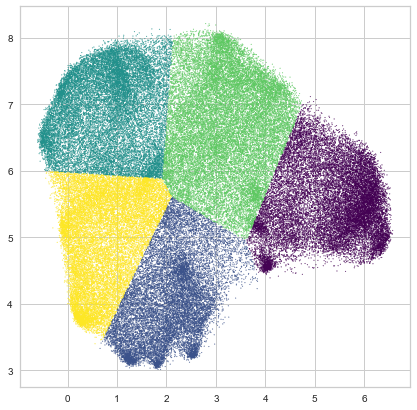

In [29]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters_umap,cmap='viridis')
plt.show()

### Submit on Kaggle: Worse than n=6
* 0.33438: Worse than 5 clusters. Stick to 6 clusters?

In [30]:
clusters_df=pd.DataFrame(clusters_umap,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission.csv")

## n=6, UMAP(4comp)

In [31]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(Data)

In [32]:
reducer=umap.UMAP(n_neighbors=40,n_components=4,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

In [36]:
clusterer=KMeans(n_clusters=6,n_init=60)
clusters_umap=clusterer.fit_predict(umap_data)

In [37]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

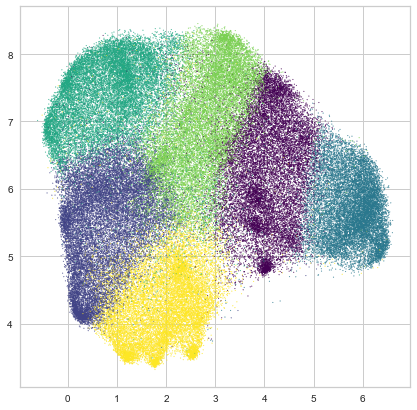

In [38]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters_umap,cmap='viridis')
plt.show()

### Kaggle: 0.36808

In [39]:
clusters_df=pd.DataFrame(clusters_umap,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission.csv")

## n=7, UMAP(7comp)

In [40]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(Data)

In [41]:
reducer=umap.UMAP(n_neighbors=40,n_components=7,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

In [42]:
clusterer=KMeans(n_clusters=7,n_init=70)
clusters_umap=clusterer.fit_predict(umap_data)

In [43]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

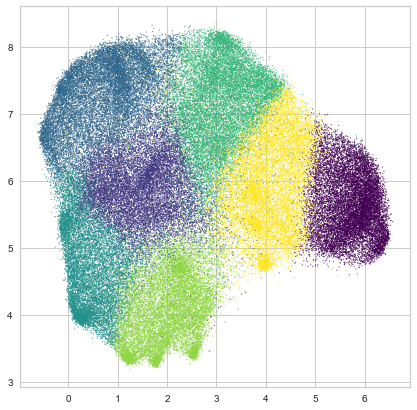

In [44]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters_umap,cmap='viridis')
plt.show()

### Kaggle: 0.39219

In [45]:
clusters_df=pd.DataFrame(clusters_umap,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission.csv")

## n=7, UMAP(15comp), spread=1.2

In [49]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(Data)

In [50]:
reducer=umap.UMAP(n_neighbors=40,n_components=15,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1,spread=1.2)
umap_data=reducer.fit_transform(data_scaled)

In [51]:
clusterer=KMeans(n_clusters=7,n_init=80)
clusters_umap=clusterer.fit_predict(umap_data)

In [52]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1,spread=1.2)
umap_data=reducer.fit_transform(data_scaled)

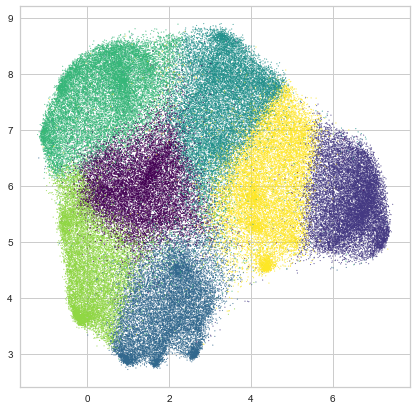

In [53]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters_umap,cmap='viridis')
plt.show()

### Submit on Kaggle: Tiny improv. over Best Score!
* 0.39361

In [54]:
clusters_df=pd.DataFrame(clusters_umap,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission.csv")

## Visualizing UMAP 2, 7 clusters vs all features

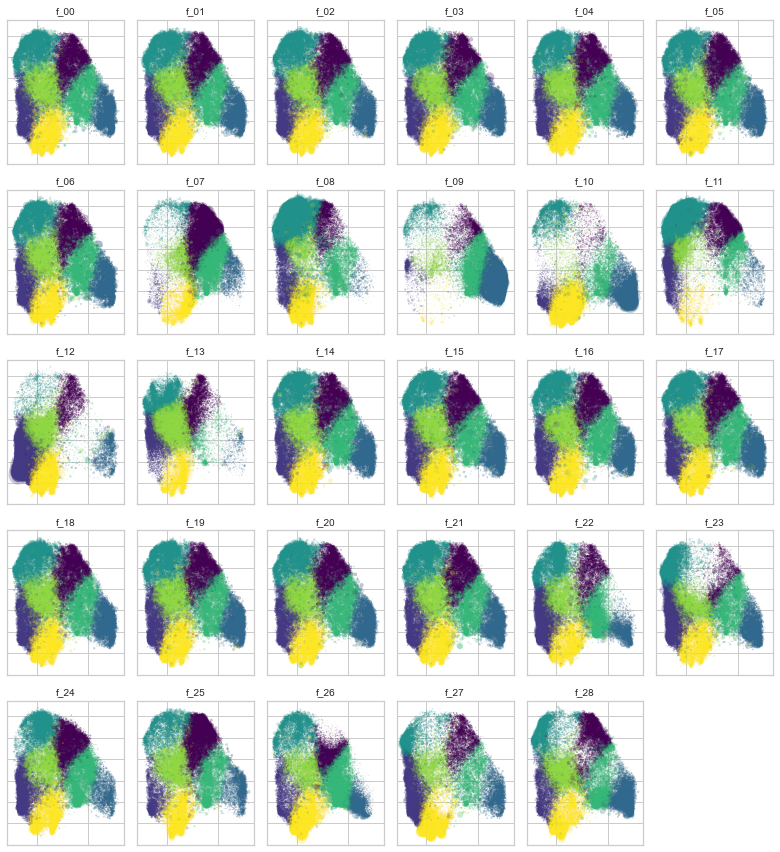

In [103]:
features=list(Data.columns)
fig, axes=plt.subplots(5,6,figsize=(11,12))
for feature,ax in zip(features,axes.ravel()[:-1]):
    size=data_scaled[:,features.index(feature)]**3
    ax.scatter(umap_data[:,0],umap_data[:,1],cmap='viridis',s=size,alpha=0.25,c=clusters_umap)
    ax.tick_params(axis='both',which='both',top=False,bottom=False,right=False,left=False,
                   labelleft=False,labelbottom=False)
    ax.set_title(feature,fontsize=10)
fig.delaxes(axes[4][5])
plt.tight_layout()


# fig, ax=plt.subplots(figsize=(7,7))
# ax.scatter(umap_data[:,0],umap_data[:,1],s=data_scaled[:,0]**3,alpha=0.4,c=clusters_umap,cmap='viridis')
# plt.show()

# GMM

## PowerTransform Entire Data, Visualize using UMAP, 7 clusters

In [6]:
scaler=PowerTransformer()
data_scaled=scaler.fit_transform(Data)

In [9]:
model=GaussianMixture(n_components=7)
clusters=model.fit_predict(data_scaled)

In [10]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

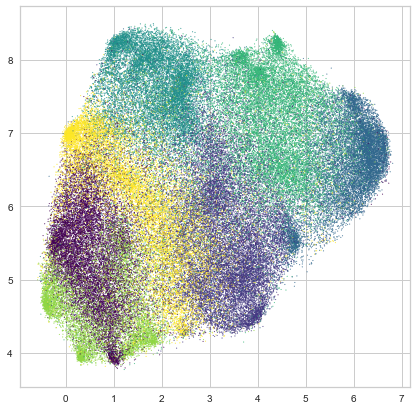

In [14]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters,cmap='viridis')
plt.show()

In [17]:
prob=model.predict_proba(data_scaled)

In [20]:
cols=[str(x) for x in range(0,7)]
prob=pd.DataFrame(prob,columns=cols)

## PowerTransform Selected Features, Visualize using UMAP, 7 clusters

In [28]:
#slice
features=['f_0'+ str(x) for x in range(0,10)] + ['f_'+ str(x) for x in range(10,29)]

In [31]:
filter1=features[7:14]+features[22:]

In [32]:
scaler=PowerTransformer()
data_scaled=scaler.fit_transform(Data[filter1])

In [35]:
model=GaussianMixture(n_components=7)
clusters=model.fit_predict(data_scaled)

In [36]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

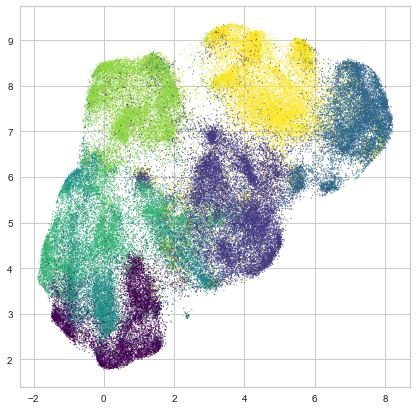

In [37]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters,cmap='viridis')
plt.show()

In [39]:
clusters[0:20]

array([5, 4, 5, 2, 1, 4, 2, 5, 5, 4, 1, 4, 5, 6, 1, 5, 2, 4, 6, 1],
      dtype=int64)

In [57]:
clusters_df=pd.DataFrame(clusters,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission1.csv")

## PowerTransform Selected Features, Visualize using UMAP, 4 clusters

In [64]:
#slice
features=['f_0'+ str(x) for x in range(0,10)] + ['f_'+ str(x) for x in range(10,29)]

In [65]:
filter1=features[7:14]+features[22:]

In [66]:
scaler=PowerTransformer()
data_scaled=scaler.fit_transform(Data[filter1])

In [67]:
model=GaussianMixture(n_components=4)
clusters_4=model.fit_predict(data_scaled)

In [71]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

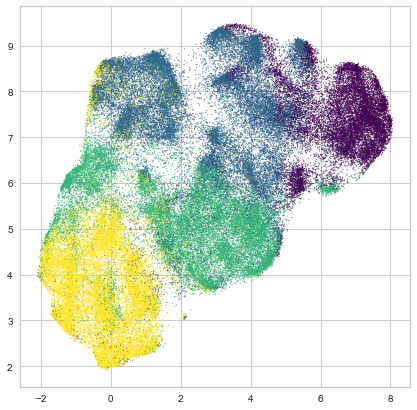

In [72]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.7,alpha=0.7,c=clusters_4,cmap='viridis')
plt.show()

In [39]:
clusters[0:20]

array([5, 4, 5, 2, 1, 4, 2, 5, 5, 4, 1, 4, 5, 6, 1, 5, 2, 4, 6, 1],
      dtype=int64)

In [68]:
# clusters_df=pd.DataFrame(clusters,columns=["Predicted"],index=Data.index)
# clusters_df.to_csv("submission1.csv")

## PowerTransform selected features, Feed UMAP to Gaussian, 7 clusters

In [42]:
#slice
features=['f_0'+ str(x) for x in range(0,10)] + ['f_'+ str(x) for x in range(10,29)]

In [43]:
filter1=features[7:14]+features[22:]

In [44]:
scaler=PowerTransformer()
data_scaled=scaler.fit_transform(Data[filter1])

In [103]:
reducer=umap.UMAP(n_neighbors=40,n_components=11,min_dist=0.0,metric='cosine',
                  n_epochs=650,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

In [104]:
model=GaussianMixture(n_components=7)
clusters_2=model.fit_predict(umap_data)

In [48]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data1=reducer.fit_transform(data_scaled)

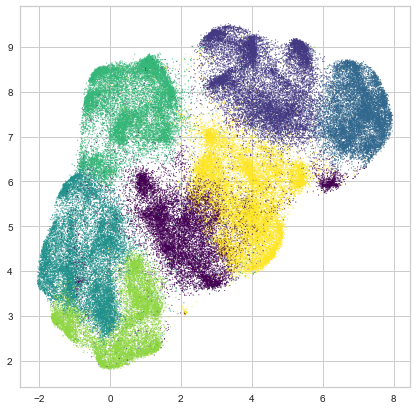

In [105]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data1[:,0],umap_data1[:,1],s=0.7,alpha=0.7,c=clusters_2,cmap='viridis')
plt.show()

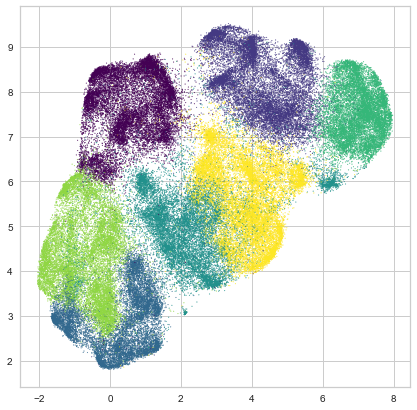

In [97]:
# fig, ax=plt.subplots(figsize=(7,7))
# ax.scatter(umap_data1[:,0],umap_data1[:,1],s=0.7,alpha=0.7,c=clusters_2,cmap='viridis')
# plt.show()

In [106]:
np.unique(clusters_2,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([13284, 14875, 11434, 15789, 14622, 10942, 17054], dtype=int64))

In [98]:
# np.unique(clusters_2,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([14688, 14856, 11385, 14052, 11416, 15113, 16490], dtype=int64))

In [107]:
clusters_df=pd.DataFrame(clusters_2,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission2.csv")

### Kaggle Score: 0.60642, Best One!
* With UMAP=11 components and 7 clusters
* Previous: 0.60146, With n=7, UMAP components=8
* Previous: 0.56228, n=7, UMAP components: 4

#### Experiment: GMM with 2 UMAP components

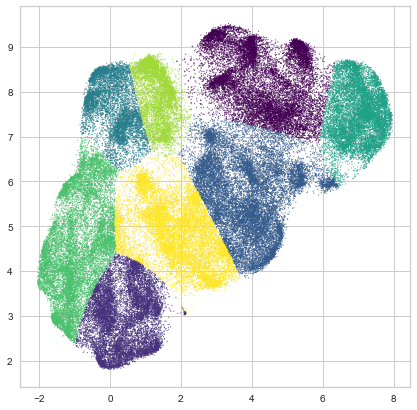

In [101]:
model=GaussianMixture(n_components=8)
clusters_6=model.fit_predict(umap_data1)
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data1[:,0],umap_data1[:,1],s=0.7,alpha=0.7,c=clusters_6,cmap='viridis')
plt.show()

## PowerTransform selected features, Feed UMAP to Gaussian, 4 clusters

In [50]:
#slice
features=['f_0'+ str(x) for x in range(0,10)] + ['f_'+ str(x) for x in range(10,29)]

In [51]:
filter1=features[7:14]+features[22:]

In [52]:
scaler=PowerTransformer()
data_scaled=scaler.fit_transform(Data[filter1])

In [53]:
reducer=umap.UMAP(n_neighbors=40,n_components=4,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

In [54]:
model=GaussianMixture(n_components=4)
clusters_3=model.fit_predict(umap_data)

In [55]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

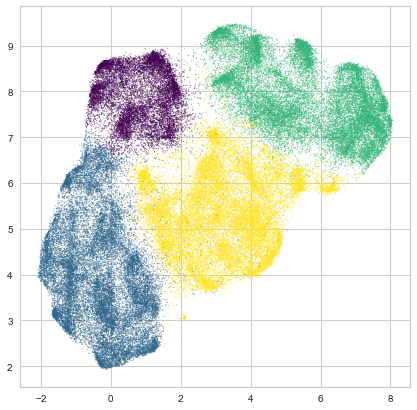

In [80]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data[:,0],umap_data[:,1],s=0.6,alpha=0.5,c=clusters_3,cmap='viridis')
plt.show()

In [59]:
clusters_df=pd.DataFrame(clusters_3,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission3.csv")

In [73]:
np.unique(clusters_3,return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([13191, 28672, 26505, 29632], dtype=int64))

### Kaggle Score: 0.42877, Second best! (Better than KMeans)

## PowerTransform selected features, Feed UMAP to Gaussian, 5 clusters

In [81]:
#slice
features=['f_0'+ str(x) for x in range(0,10)] + ['f_'+ str(x) for x in range(10,29)]

In [82]:
filter1=features[7:14]+features[22:]

In [83]:
scaler=PowerTransformer()
data_scaled=scaler.fit_transform(Data[filter1])

In [90]:
reducer=umap.UMAP(n_neighbors=40,n_components=9,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data=reducer.fit_transform(data_scaled)

In [91]:
model=GaussianMixture(n_components=5)
clusters_5=model.fit_predict(umap_data)

In [86]:
reducer=umap.UMAP(n_neighbors=40,n_components=2,min_dist=0.0,metric='cosine',
                  n_epochs=400,n_jobs=-1)
umap_data1=reducer.fit_transform(data_scaled)

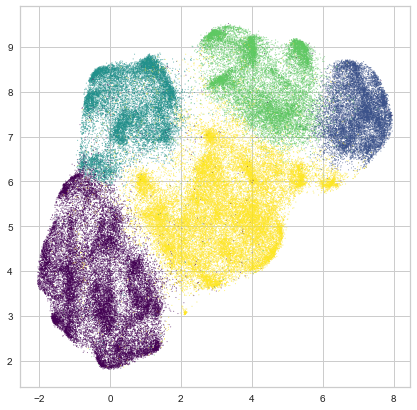

In [92]:
fig, ax=plt.subplots(figsize=(7,7))
ax.scatter(umap_data1[:,0],umap_data1[:,1],s=0.6,alpha=0.5,c=clusters_5,cmap='viridis')
plt.show()

In [93]:
clusters_df=pd.DataFrame(clusters_5,columns=["Predicted"],index=Data.index)
clusters_df.to_csv("submission.csv")

In [94]:
np.unique(clusters_5,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([27057, 11416, 14462, 14726, 30339], dtype=int64))

### Kaggle: 0.49957